In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
Label_data = pd.read_csv("D:/Analytics/UCF/Machine Learning/Assignments/Label_Data.csv")

In [3]:
Label_data

,Records,Date,University,Stay,Opponent,Media,Decision
0,1,9/2/2017,Temple,Home,Out,1-NBC,Win
1,2,9/9/2017,Georgia,Home,In,1-NBC,Lose
2,3,9/16/2017,Boston College,Away,Out,2-ESPN,Win
3,4,9/23/2017,Michigan State,Away,Out,3-FOX,Win
4,5,9/30/2017,Miami Ohio,Home,Out,1-NBC,Win
5,6,10/7/2017,North Carolina,Away,Out,4-ABC,Win
6,7,10/19/2017,USC,Home,In,1-NBC,Lose
7,8,10/25/2017,North Carolina State,Home,Out,1-NBC,Win
8,9,11/4/2017,Wake Forest,Home,Out,1-NBC,Win
9,10,11/12/2017,Miami Florida,Away,In,4-ABC,Lose


In [52]:
Label_data2 = Label_data

In [53]:
Label_data2

,Records,Date,University,Stay,Opponent,Media,Decision
0,1,9/2/2017,Temple,Home,Out,1-NBC,Win
1,2,9/9/2017,Georgia,Home,In,1-NBC,Lose
2,3,9/16/2017,Boston College,Away,Out,2-ESPN,Win
3,4,9/23/2017,Michigan State,Away,Out,3-FOX,Win
4,5,9/30/2017,Miami Ohio,Home,Out,1-NBC,Win
5,6,10/7/2017,North Carolina,Away,Out,4-ABC,Win
6,7,10/19/2017,USC,Home,In,1-NBC,Lose
7,8,10/25/2017,North Carolina State,Home,Out,1-NBC,Win
8,9,11/4/2017,Wake Forest,Home,Out,1-NBC,Win
9,10,11/12/2017,Miami Florida,Away,In,4-ABC,Lose


In [4]:
Label_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
Records        12 non-null int64
Date           12 non-null object
University     12 non-null object
Stay           12 non-null object
Opponent       12 non-null object
Media          12 non-null object
Decision       12 non-null object
dtypes: int64(1), object(6)
memory usage: 800.0+ bytes


In [5]:
Label_data['Decision'],class_names = pd.factorize(Label_data['Decision'])

In [6]:
print(class_names)

Index(['Win', 'Lose'], dtype='object')


In [7]:
print(Label_data['Decision'].unique())

[0 1]


In [8]:
Label_data['Stay'],_ = pd.factorize(Label_data['Stay'])

In [9]:
Label_data['Opponent'],_ = pd.factorize(Label_data['Opponent'])

In [10]:
Label_data['Media'],_ = pd.factorize(Label_data['Media'])

In [11]:
Label_data

,Records,Date,University,Stay,Opponent,Media,Decision
0,1,9/2/2017,Temple,0,0,0,0
1,2,9/9/2017,Georgia,0,1,0,1
2,3,9/16/2017,Boston College,1,0,1,0
3,4,9/23/2017,Michigan State,1,0,2,0
4,5,9/30/2017,Miami Ohio,0,0,0,0
5,6,10/7/2017,North Carolina,1,0,3,0
6,7,10/19/2017,USC,0,1,0,1
7,8,10/25/2017,North Carolina State,0,0,0,0
8,9,11/4/2017,Wake Forest,0,0,0,0
9,10,11/12/2017,Miami Florida,1,1,3,1


In [12]:
Label_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
Records        12 non-null int64
Date           12 non-null object
University     12 non-null object
Stay           12 non-null int64
Opponent       12 non-null int64
Media          12 non-null int64
Decision       12 non-null int64
dtypes: int64(5), object(2)
memory usage: 800.0+ bytes


In [13]:
X = Label_data.iloc[:,3:6]
y = Label_data.iloc[:,-1]

In [14]:
X

,Stay,Opponent,Media
0,0,0,0
1,0,1,0
2,1,0,1
3,1,0,2
4,0,0,0
5,1,0,3
6,0,1,0
7,0,0,0
8,0,0,0
9,1,1,3


In [15]:
y

0     0
1     1
2     0
3     0
4     0
5     0
6     1
7     0
8     0
9     1
10    0
11    1
Name: Decision, dtype: int64

In [16]:
train_dist = int(0.5 * len(X))
X_train, X_test = X[:train_dist], X[train_dist:]
y_train, y_test = y[:train_dist], y[train_dist:]

In [17]:
X_train

,Stay,Opponent,Media
0,0,0,0
1,0,1,0
2,1,0,1
3,1,0,2
4,0,0,0
5,1,0,3


In [18]:
X_test

,Stay,Opponent,Media
6,0,1,0
7,0,0,0
8,0,0,0
9,1,1,3
10,0,0,0
11,1,1,3


In [19]:
y_train

0    0
1    1
2    0
3    0
4    0
5    0
Name: Decision, dtype: int64

In [20]:
y_test

6     1
7     0
8     0
9     1
10    0
11    1
Name: Decision, dtype: int64

# ID3: information gain (a.k.a., entropy based gain)

In [28]:
entropy_dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [29]:
entropy_dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [30]:
entropy_y_pred = entropy_dtree.predict(X_test)

In [31]:
entropy_y_pred

array([1, 0, 0, 1, 0, 1], dtype=int64)

In [64]:
entropy_count_misclassified = (y_test != entropy_y_pred).sum()
print('Misclassified samples: {}'.format(entropy_count_misclassified))

Misclassified samples: 0


In [63]:
entropy_accuracy = metrics.accuracy_score(y_test, entropy_y_pred)
print('Accuracy: {:.2f}'.format(entropy_accuracy))

Accuracy: 1.00


[Text(167.4, 163.07999999999998, 'X[1] <= 0.5\nentropy = 0.65\nsamples = 6\nvalue = [5, 1]'),
 Text(83.7, 54.360000000000014, 'entropy = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]')]

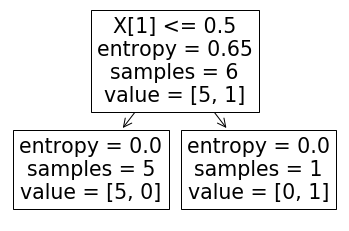

In [34]:
tree.plot_tree(entropy_dtree.fit(X_train, y_train))

In [35]:
print(confusion_matrix(y_test, entropy_y_pred))
print(classification_report(y_test, entropy_y_pred))

[[3 0]
 [0 3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



# CART: gini index

In [36]:
gini_dtree = tree.DecisionTreeClassifier(criterion='gini', max_depth=3)

In [37]:
gini_dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [38]:
gini_y_pred = gini_dtree.predict(X_test)

In [39]:
gini_y_pred

array([1, 0, 0, 1, 0, 1], dtype=int64)

In [40]:
gini_count_misclassified = (y_test != gini_y_pred).sum()
print('Misclassified samples: {}'.format(gini_count_misclassified))

Misclassified samples: 0


In [41]:
gini_accuracy = metrics.accuracy_score(y_test, gini_y_pred)
print('Accuracy: {:.2f}'.format(gini_accuracy))

Accuracy: 1.00


[Text(167.4, 163.07999999999998, 'X[1] <= 0.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

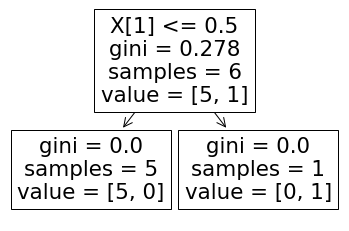

In [42]:
tree.plot_tree(gini_dtree.fit(X_train, y_train))

In [43]:
print(confusion_matrix(y_test, gini_y_pred))
print(classification_report(y_test, gini_y_pred))

[[3 0]
 [0 3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



# C4.5: gain ratio

In [44]:
pip install chefboost

Note: you may need to restart the kernel to use updated packages.


In [4]:
from chefboost import Chefboost as ch

In [5]:
config = {'algorithm':'C4.5'}

In [7]:
Model_data = Label_data.iloc[:,3:7]

In [8]:
Model_data

,Stay,Opponent,Media,Decision
0,Home,Out,1-NBC,Win
1,Home,In,1-NBC,Lose
2,Away,Out,2-ESPN,Win
3,Away,Out,3-FOX,Win
4,Home,Out,1-NBC,Win
5,Away,Out,4-ABC,Win
6,Home,In,1-NBC,Lose
7,Home,Out,1-NBC,Win
8,Home,Out,1-NBC,Win
9,Away,In,4-ABC,Lose


In [9]:
c45_model = ch.fit(Model_data,config)

C4.5  tree is going to be built...
Accuracy:  100.0 % on  12  instances
finished in  0.09456872940063477  seconds
